In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 14})

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + "/filtered_customer_booking.csv", index_col=0)

In [4]:
df = df.reset_index(drop=True)
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49978,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49979,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49980,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [7]:
# one hot encode the categorical columns

In [8]:
df_final = df

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#sales channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_final = df_final.join(encoder_df)

#trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTrip', 1:'OneWay Trip', 2:'Circle trip'})
df_final = df_final.join(encoder_df)

In [10]:
#drop categorical column
df_final.drop(['sales_channel', 'trip_type', 'booking_origin', 'route'], axis=1, inplace=True)

In [11]:
#for supervised learning, store the label
label = df['booking_complete']

In [12]:
df_final = df_final.drop('booking_complete', axis=1)

In [13]:
df_final

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWay Trip,Circle trip
0,2,262,19,7,6,1,0,0,5.52,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,2,27,6,9,6,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49978,1,111,6,4,7,0,0,0,5.62,1.0,0.0,0.0,0.0,1.0
49979,1,24,6,22,6,0,0,1,5.62,1.0,0.0,0.0,0.0,1.0
49980,1,15,6,11,1,1,0,1,5.62,1.0,0.0,0.0,0.0,1.0


In [14]:
#Normalizing the values

In [15]:
from sklearn.preprocessing import StandardScaler
#create ss object
scaler = StandardScaler()
#fit and transform the data
scaled_df = scaler.fit_transform(df_final)

In [17]:
#create dataframe of scaled data
scaled_df = pd.DataFrame(scaled_df, columns = df_final.columns)

In [18]:
#add label back to dataframe
scaled_df['label'] = label

In [19]:
scaled_df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWay Trip,Circle trip,label
0,0.400769,1.971093,-0.119401,-0.381588,1.096876,0.703587,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,-0.579424,0.302987,-0.089895,-1.120618,1.096876,-1.421288,-0.650054,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,1.759799,-0.030885,1.465988,-0.408618,0.703587,1.538334,-0.863557,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,-0.579424,0.125056,0.234662,-0.935861,1.096876,-1.421288,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
4,0.400769,-0.186323,-0.030885,1.096473,-0.408618,0.703587,-0.650054,1.158002,-1.174049,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,0.400769,-0.642272,-0.502969,-0.012073,1.096876,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49978,-0.579424,0.291867,-0.502969,-0.935861,1.598707,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49979,-0.579424,-0.675634,-0.502969,2.389776,1.096876,-1.421288,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
49980,-0.579424,-0.775721,-0.502969,0.357443,-1.412280,0.703587,-0.650054,1.158002,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [20]:
#correlation matrix

<AxesSubplot:>

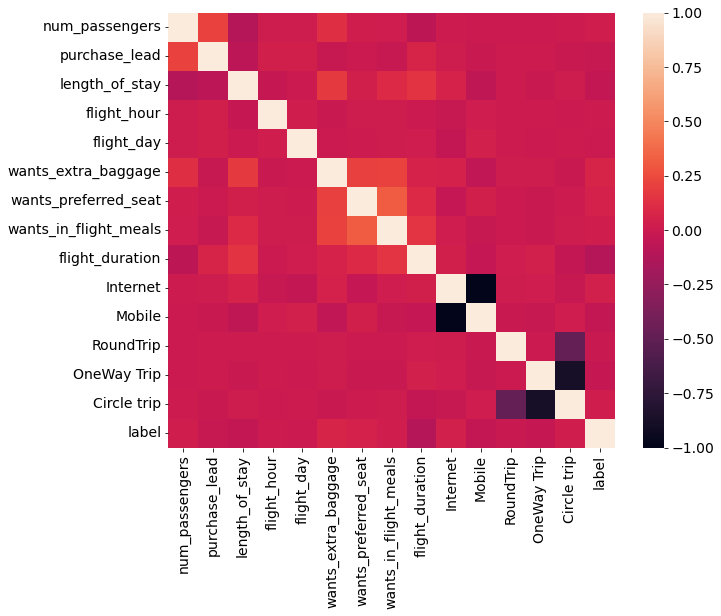

In [22]:
corr = scaled_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr)

In [23]:
#now, we will split the dataset into train and test set

In [26]:
from sklearn.model_selection import train_test_split
x = scaled_df.iloc[:,:-1]
y = scaled_df['label']
x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size = 0.20, random_state = 42) 

In [29]:
!pip install yellowbrick

     |████████████████████████████████| 282 kB 1.3 MB/s eta 0:00:01


In [31]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisitcRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.inspection import permutation_importance
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

In [32]:
#now, we will create a function to fit and predict the values of whether customer would complete the booking.
#Also functions with metrics to evaluate the model prediction

In [33]:
def model_fit_predict(model, X, y, X_predict):
    model.fit(X, y)
    return model.predict(X_predict)

def acc_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def pre_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

def f_score(y_true, y_pred):
    return f1_score(y_true, y_pred)

In [34]:
# Random Forest Classifier

In [35]:
#now we will create a instance of the classifier and fit the training data

clf_rf = RandomForestClassifier(max_depth = 50, min_samples_split = 5, random_state=0)

In [36]:
# Now we will check the training Accuracy 

In [39]:
y_pred_train = model_fit_predict(clf_rf, x_train, y_train, x_train)
set(y_pred_train)

#f1 score for training data
f1 = round(f1_score(y_train, y_pred_train),2)

#accuracy score training data
acc = round(accuracy_score(y_train, y_pred_train),2)

#precision score for training data
pre = round(precision_score(y_train, y_pred_train),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.93, 1.0 and 0.72 respectively


0.9341002876078529

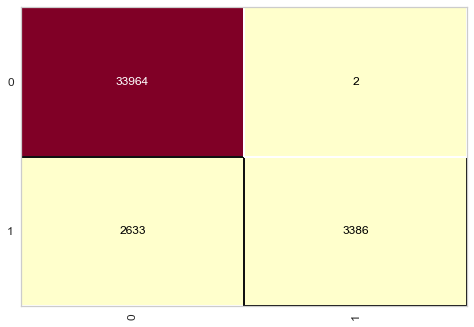

In [41]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(x_train, y_train)

cm.score(x_train, y_train)

In [42]:
#checking Testing Accuracy

In [43]:
#create an instance of the classifier and fit the training data

clf_rf = RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

y_pred_test = model_fit_predict(clf_rf, x_train, y_train, x_test)

#f1 score for training data
f1 = round(f1_score(y_test, y_pred_test),2)

#accuracy score for training data
acc = round(accuracy_score(y_test, y_pred_test),2)

#precision score for training data
pre = round(precision_score(y_test, y_pred_test),2)

print(f"Accuracy, precision and f1-score for training data are {acc}, {pre} and {f1} respectively")

Accuracy, precision and f1-score for training data are 0.86, 0.56 and 0.07 respectively


0.8554566369910973

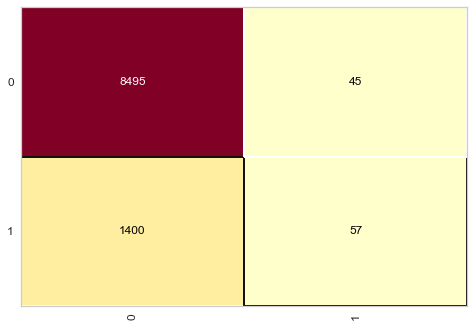

In [44]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(x_train, y_train)

cm.score(x_test, y_test)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

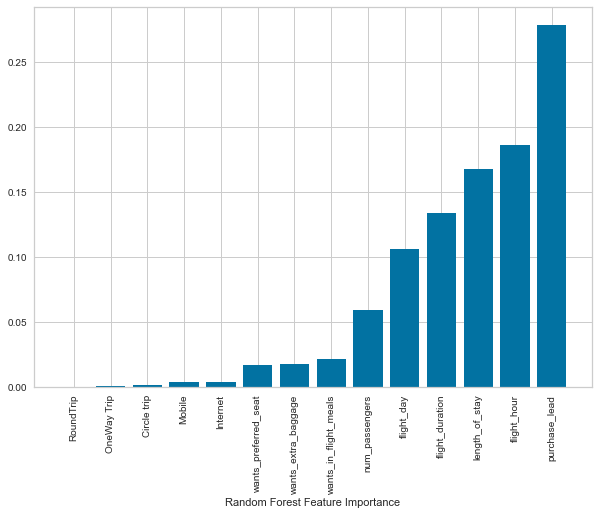

In [53]:
plt.figure(figsize=(10,7))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.bar(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.xticks(rotation=90)

In [54]:
# getting low f1 score is because of imbalanced dataset.

In [55]:
#we need to balance the dataset

In [56]:
scaled_df.label.value_counts()

0    42506
1     7476
Name: label, dtype: int64

In [57]:
#we will create a dataframe having all labels 0 with 10000 samples
scaled_df_0 = scaled_df[scaled_df.label ==0].sample(n=8000)

In [59]:
# we will concatenate 2 dataframe, one having all labels 0 and other having all label as 1
scaled_df_new = pd.concat([scaled_df[scaled_df.label==1], scaled_df_0], ignore_index=True)

In [60]:
#we will shuffle dataframe rows

In [61]:
scaled_df_new = scaled_df_new.sample(frac = 1).reset_index(drop=True)

In [62]:
scaled_df_new

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,Internet,Mobile,RoundTrip,OneWay Trip,Circle trip,label
0,-0.579424,1.137040,-0.089895,-0.196830,1.598707,-1.421288,1.538334,1.158002,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
1,2.361155,3.261094,-0.502969,-1.490134,1.598707,0.703587,1.538334,1.158002,-0.439155,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
2,0.400769,-0.697876,0.205157,-1.490134,-0.408618,0.703587,-0.650054,-0.863557,1.037314,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
3,0.400769,-0.620031,-0.502969,0.542200,-0.408618,0.703587,1.538334,1.158002,0.930420,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
4,1.380962,-0.453220,-0.561979,0.726958,-0.910449,0.703587,1.538334,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15471,-0.579424,-0.353134,-0.148906,-0.381588,-0.408618,0.703587,-0.650054,-0.863557,0.195526,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15472,0.400769,1.715317,-0.591484,0.542200,-0.910449,0.703587,-0.650054,-0.863557,-0.185282,0.355786,-0.355786,-0.048231,-0.088336,0.100826,1
15473,-0.579424,1.048074,-0.119401,-0.196830,-0.408618,-1.421288,-0.650054,-0.863557,-1.107240,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0
15474,-0.579424,-0.097358,-0.502969,-1.120618,-0.408618,-1.421288,1.538334,-0.863557,-1.741921,0.355786,-0.355786,-0.048231,-0.088336,0.100826,0


In [64]:
x=scaled_df_new.iloc[:,:-1]
y=scaled_df_new['label']

x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(), y.to_numpy(), test_size=0.20, random_state=42)

In [65]:
#create instance of the classifier and fit training data
clf_rf=RandomForestClassifier(n_estimators=50, max_depth=50, min_samples_split=5, random_state=0)


In [67]:
y_pred_test = model_fit_predict(clf_rf, x_train, y_train, x_test)
f1= round(f1_score(y_test, y_pred_test),2)
acc= round(accuracy_score(y_test, y_pred_test),2)
pre= round(precision_score(y_test, y_pred_test),2)
recall= round(recall_score(y_test, y_pred_test),2)
specificity= round(recall_score(y_test, y_pred_test, pos_label=0),2)

print(f"Accuracy, Precision, recall and f1-score for training data are {acc},{pre}, {recall}, {specificity} and {f1} respectively")

Accuracy, Precision, recall and f1-score for training data are 0.61,0.6, 0.58, 0.64 and 0.59 respectively


0.6101421188630491

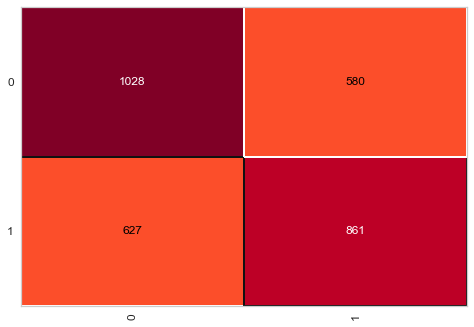

In [68]:
cm = ConfusionMatrix(clf_rf, classes=[0,1])
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

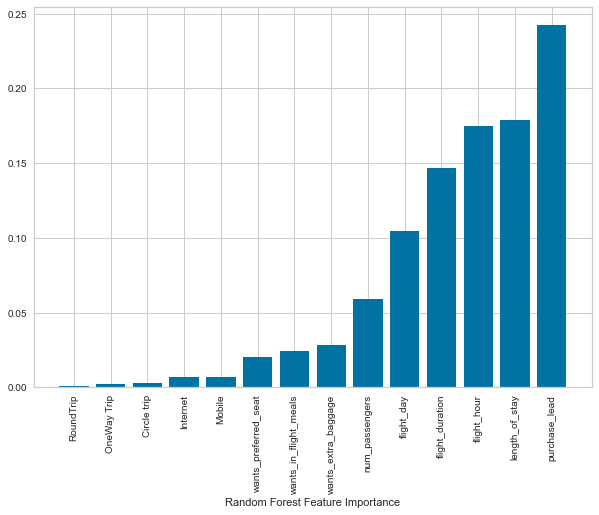

In [72]:
plt.figure(figsize=(10,7))
sorted_idx = clf_rf.feature_importances_.argsort()
plt.bar(scaled_df.iloc[:,:-1].columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.xticks(rotation=90)